# Using CNN to classifiy malicious PE files into malware family (With AutoEncoder)

Please take a careful look at the following tutorial.

https://www.tensorflow.org/tutorials/keras/classification

It is an example of using tensorflow/keras to build a simple neural network to classify images of clothing. The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

Please write your homework by modifying this tutorial. We will provide you the first 748 bytes of several PE files and their corresponding class labels (just like the example in the tutorial). Would you please desgin a more complicated neural network (e.g., using convolution, pooling, dense, dropout, dense, softmax, ...) to increase the classification accuracy.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

print(tf.__version__)

2.2.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Get pefiles

In [2]:
!wget https://drive.google.com/uc?id=1Vm3K0F8LdtvEh-8GoDtJELu5Qo179aVw -O pefiles.pickle

--2020-06-13 11:54:46--  https://drive.google.com/uc?id=1Vm3K0F8LdtvEh-8GoDtJELu5Qo179aVw
Resolving drive.google.com (drive.google.com)... 173.194.79.101, 173.194.79.139, 173.194.79.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nhkv05ve0a7pr5pinki0tkotfoubl9eq/1592049225000/17174434063503717705/*/1Vm3K0F8LdtvEh-8GoDtJELu5Qo179aVw [following]
--2020-06-13 11:54:46--  https://doc-0c-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nhkv05ve0a7pr5pinki0tkotfoubl9eq/1592049225000/17174434063503717705/*/1Vm3K0F8LdtvEh-8GoDtJELu5Qo179aVw
Resolving doc-0c-38-docs.googleusercontent.com (doc-0c-38-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to doc-0c-38-docs.googleusercontent.com (doc-0c-38-docs.googleusercontent.com)|108.1

In [3]:
!ls -al

total 292
drwxr-xr-x 1 root root   4096 Jun 13 11:14 .
drwxr-xr-x 1 root root   4096 Jun 13 11:14 ..
drwxr-xr-x 1 root root   4096 Jun 10 16:28 .config
-rw-r--r-- 1 root root 282207 Jun 13 11:54 pefiles.pickle
drwxr-xr-x 1 root root   4096 Jun 10 16:28 sample_data


### load training data

In [0]:
import pickle

def my_load_data(p):
  with open(p, 'rb') as fd:
    tu = pickle.load(fd)
  return (tu[0], tu[1])

In [0]:
(train_images, train_labels) = my_load_data("/content/pefiles.pickle")

In [0]:
# now go https://www.tensorflow.org/tutorials/keras/classification
# and try to understand the tutorial
# and write your code below.
# My codes is very similar to the tutorial.

In [7]:
# our data includes 11 different malware families
class_names = ['Urausy.C', 'Elkern.B', 'Fareit', 'Hotbar', 'Gepys.A', 'Bulta!rfn', 'Zbot',
               'GameVance', 'Zegost.B', 'Bifrose.AE', 'Zbot!GO']
len_classes = len(class_names)

print(len_classes)

11


### Explore the data

In [8]:
# We have 356 malware pefiles, and each of them is a 28x28 byte array.
train_images.shape

(356, 28, 28)

In [9]:
# The lenght of the label is 356 as well.
len(train_labels)

356

In [10]:
# Each label is an integer.
# The 1st malware's label is 5.
# It stands for that the 1st malware belongs to 'Urausy.C' family.
# See class_names.
train_labels

array([ 5,  4,  2,  6,  3,  7,  2,  3,  0,  2,  2,  3,  7,  3,  3,  3,  2,
        2,  7,  9,  5,  1,  4, 10,  2,  4,  0,  6,  2,  6,  2,  3,  4,  2,
        2,  2,  6, 10,  2,  3,  2,  0,  2,  3,  4,  0, 10,  3,  2,  4,  2,
        2,  2,  9,  2,  5,  0,  5,  4,  3,  0,  2,  3,  3,  2,  3,  1,  2,
        0,  4,  3,  4,  3,  2,  3,  1,  4,  2,  0,  1,  6,  4,  3,  4,  2,
        3,  2,  5,  7,  2,  3,  3,  8,  5,  6,  4,  4,  0,  3,  6,  0,  3,
        7,  4,  9,  6,  2,  3,  4,  4,  1,  2, 10,  4, 10,  4,  3,  6,  8,
        4,  0,  0,  0,  9,  3,  4,  1,  2,  0,  2, 10,  3,  2,  3,  2,  2,
        4,  3,  3,  4,  2,  3,  2,  0,  8,  6,  2,  2, 10,  3,  0,  4,  5,
        5,  0,  3,  9,  9,  2,  0,  1,  5,  0,  6,  6,  6,  3,  9,  6, 10,
        3,  6,  8,  2,  4,  0,  3,  3,  6,  5,  4,  4,  4,  2,  3,  1,  1,
       10,  3,  3,  5,  3,  2,  6,  3,  8,  2,  2,  0,  0,  7,  2,  3,  3,
        1,  9,  4,  0,  3,  3,  0,  7,  4,  2,  5,  5, 10,  8,  6,  4,  0,
        3,  4,  4,  2,  0

In [11]:
# An example of first PE files.
# It is a 28x28 integer matrix.
train_images[0]

array([[ 77,  90,  80,   0,   2,   0,   0,   0,   0,   0,  15,   0, 255,
        255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,   0,
         26,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 124,   0,   0,   0, 186,  16,   0,  14,  31,
        180,   9, 205,  33, 184,   1,  76, 205,  33, 144, 144,  84, 104,
        105, 115],
       [ 32, 112, 114, 111, 103, 114,  97, 109,  32, 109, 117, 115, 116,
         32,  98, 101,  32, 114, 117, 110,  32, 117, 110, 100, 101, 114,
         32,  87],
       [105, 110,  51,  50,  13,  10,  36,  55,   0,   0,   0,   0,  80,
         69,   0,   0,  76,   1,   4,   0, 254, 114,  22,  79,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 224,   0,  15,   1,  11,   1,  10,   0,   0,
         22,   0,   0,   0, 184,   5,   0,   0,   0,   0,   0, 180,  20,
          0,   0],
       [  

### Preprocess the data

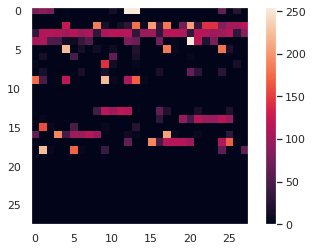

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Note that we view the first 28x28 bytes of a PE file as an image.
# A byte with value '0x00' has darkest color,
# whilw a byte with value '0xFF' has brightest color.
# Below is the visualization of the first PE file.

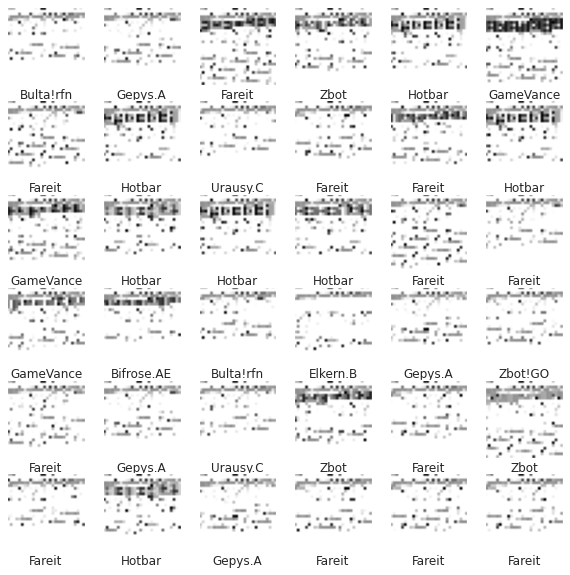

In [13]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The above images are samples of different PE files. Could you visually distinguish them? Their labels are shown under each of the image.

Q1: Before building the model, if there is anything you can do to the data, do it right here.


In [0]:
# 調整 shape
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
# Normalization (Min-Max) (From [0,255] to [0, 1])
train_images = train_images / 255.0

### Build AutoEncoder model

In [0]:
input_img = keras.layers.Input(shape=(28, 28, 1))

x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 16) i.e. 256-dimensional

x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.models.Model(input_img, decoded)

In [16]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0     

In [0]:
# split out the Encoder model from AutoEncoder
encoder = keras.models.Model(input_img, encoded)

In [18]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0   

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# early stop : 若是連續 10 次 epochs 在 validation data 上的 loss 都沒有改善，則會停止訓練
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
autoencoder.fit(train_images, train_images,
                epochs=500,
                shuffle=True,
                validation_split=0.2,
                callbacks=[callback])

Epoch 1/500
9/9 [==============================] - 1s 59ms/step - loss: 0.6642 - accuracy: 0.5909 - val_loss: 0.5701 - val_accuracy: 0.7052
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4465 - accuracy: 0.7131 - val_loss: 0.4300 - val_accuracy: 0.7052
Epoch 3/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3718 - accuracy: 0.7131 - val_loss: 0.3552 - val_accuracy: 0.7052
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3323 - accuracy: 0.7131 - val_loss: 0.3383 - val_accuracy: 0.7052
Epoch 5/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3153 - accuracy: 0.7131 - val_loss: 0.3171 - val_accuracy: 0.7052
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3001 - accuracy: 0.7131 - val_loss: 0.3051 - val_accuracy: 0.7052
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2903 - accuracy: 0.7131 - val_loss: 0.2981 - val_accuracy: 0.7052
Epoch 8/500
9/9 [=========

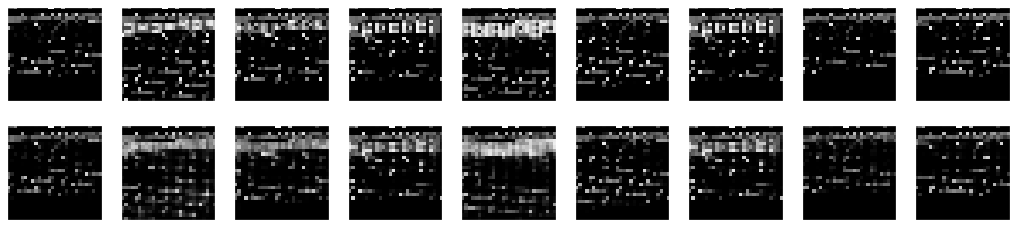

In [21]:
# original images vs. images after encoded and decoded
decoded_images = autoencoder.predict(train_images)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(train_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
# encoded images (middle layer)
encoded_images = encoder.predict(train_images)
encoded_images = encoded_images.reshape(356, 16, 16)
encoded_images.shape

(356, 16, 16)

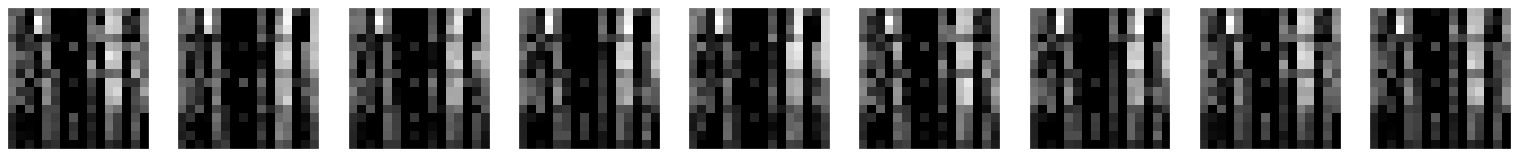

In [23]:
# check encoded images
n = 10
plt.figure(figsize=(30, 20))
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Build CNN model with encoded image as input

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(16, 16, 1), padding="same"),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len_classes, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 16, 16, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1048832   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [0]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [0]:
# reshape encoded images as 16*16
encoded_images = encoded_images.reshape(encoded_images.shape[0], 16, 16, 1)

In [28]:
# early stop : 若是連續 100 次 epochs 在 validation data 上的 loss 都沒有改善，則會停止訓練
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

# 訓練模型 (Training data 與 validation data 各為 70% 與 30%。此外，透過 callbacks 呼叫 early stop)
history = model.fit(encoded_images, train_labels, validation_split=0.3, epochs=1000, callbacks=[callback])

Epoch 1/1000
8/8 [==============================] - 0s 36ms/step - loss: 2.2222 - accuracy: 0.2048 - val_loss: 2.0075 - val_accuracy: 0.3832
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.0705 - accuracy: 0.3052 - val_loss: 1.9598 - val_accuracy: 0.3832
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.0276 - accuracy: 0.3494 - val_loss: 1.8780 - val_accuracy: 0.3832
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 1.9318 - accuracy: 0.3896 - val_loss: 1.8265 - val_accuracy: 0.3832
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 1.8519 - accuracy: 0.4217 - val_loss: 1.7904 - val_accuracy: 0.3832
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 1.8001 - accuracy: 0.4418 - val_loss: 1.7554 - val_accuracy: 0.3832
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.7448 - accuracy: 0.4257 - val_loss: 1.7041 - val_accuracy: 0.4112
Epoch 8/1000
8/8 [=

The training accuracy: 96.39%
The validation accuracy: 83.18%


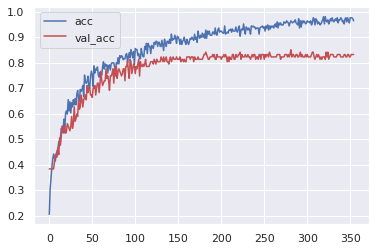

In [29]:
# Training Accuracy 與 Validation Accuracy 的變化
print("The training accuracy: {}%".format(round(history.history["accuracy"][-1]*100, 2)))
print("The validation accuracy: {}%".format(round(history.history["val_accuracy"][-1]*100, 2)))

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(acc, "b-", label="acc")
plt.plot(val_acc, "r-", label="val_acc")
plt.legend()
plt.show()

Q1: PCA or AutoEncoder? Which is better for data representation?

A1: 

AutoEncoder 對於影像資料的呈現與降維的能力比 PCA 更好，因為

1) AutoEncoder 的概念類似影像的壓縮，將原始影像對應到某個 latent space，因此在 encoded 後的影像，仍能保有原本影像的部分模樣，而若是使用 PCA 做降維，則就只是單純的降維，看不到原始影像的樣態。

2) PCA 只能做線性的降維，然而 AutoEncoder 透過 NN 可以做到非線性的降維。因此在此題影像處理上，影像的 pixel 之間很有可能有非線性的關聯，因此透過 AutoEncoder 來做降維可以保留更多重要的特徵。

Q2: What is your design of NN? Your classification accuracy rate?

A2: 

先訓練一個 AutoEncoder 來做資料的降維，而後將原始影像當作 input 進入此 AutoEncoder 的 Encoder，得到降維後的影像，再將此降維後的影像當作 input 進入另一個 CNN 分類模型進行訓練，最後得到訓練好的 CNN 模型。

最終 CNN model 在 training data 上的準確率為 96.39%，在 validation data 上的準確率為 83.18%

Q3: Implement certain ML algorithms on the same dataset. ML is better or NN is better?

In [0]:
dt_encoded_images = encoded_images.reshape(encoded_images.shape[0], 256)

In [0]:
from sklearn.model_selection import train_test_split
# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(dt_encoded_images, train_labels, test_size=.3, stratify=train_labels, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [33]:
train_acc = round(dt.score(X_train, y_train)*100, 2)
print("Training Accuracy: {} %".format(train_acc))

Training Accuracy: 89.96 %


In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score
# 預測 Test
y_pred = dt.predict(X_test)
# 計算 Accuracy
test_acc = round(accuracy_score(y_test, y_pred)*100, 2)
print('Accuracy: {}%'.format(test_acc))

Accuracy: 71.03%


A3: 

使用傳統 ML 方法 (Decision Tree)，在 training data 上的準確率為 89.96%，在 validation data 上的準確率為 71.03%。

可以發現 NN 在 training 與 validation 上的準確率都比傳統 ML 方法 (Decision Tree) 來的好一些。